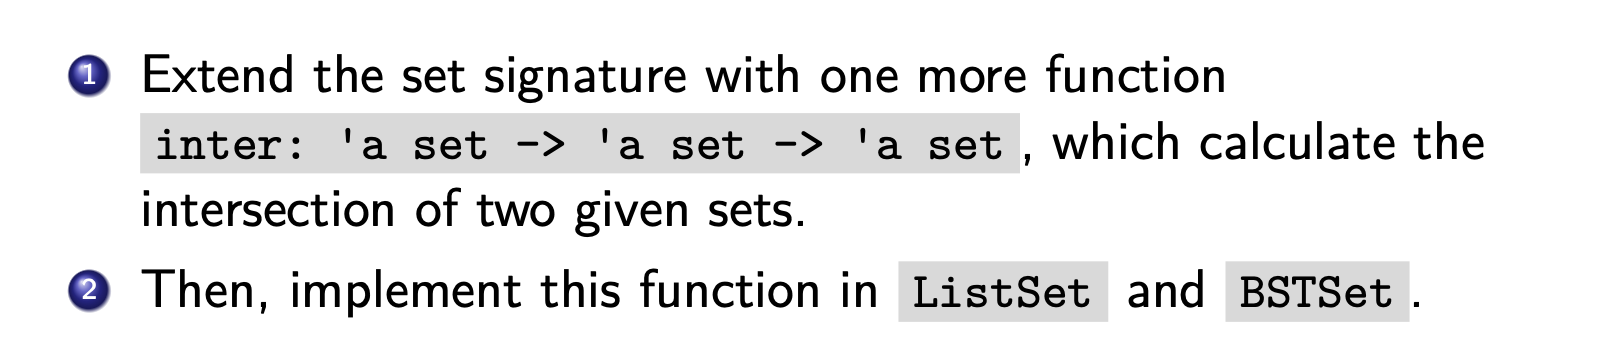

In [17]:
module type Set = sig
  type 'a set
  val empty : 'a set
  val membership : 'a -> 'a set -> bool
  val add: 'a -> 'a set -> 'a set
  val card: 'a set -> int
  val union: 'a set -> 'a set -> 'a set 
  val del: 'a -> 'a set -> 'a set 
  val inter: 'a set -> 'a set -> 'a set
end;;

module ListSet : Set with
  type 'a set = 'a list = struct
  type 'a set = 'a list
  let empty : 'a set = []
  let rec membership e = function
  | [] -> false
  | h :: t -> h = e || membership e t
  let rec add e = function
  | [] -> [e]
  | h :: t -> if h = e then h :: t else h :: add e t
  let rec card = function
  | [] -> 0
  | _ ::t -> 1 + card t  
  let rec union s1 = function
  | [] -> s1
  | [x] -> add x s1  
  | s :: t -> union (add s s1) t
  let rec del e = function
  | [] ->  []
  | h::t -> if h = e then t else h :: del e t
  let rec inter s1 = function
  | [] -> []
  | h::t -> if membership h s1 then h :: inter s1 t else inter s1 t  
end;;

type color = Red | Black;;

type 'a rbtree =
  | Leaf
  | Node of color *'a *'a rbtree *'a rbtree;;

let rec rbmem e = function
  | Leaf -> false
  | Node (_, v, l, r) ->
  if e = v then true
  else if e < v then rbmem e l
  else rbmem e r;;

let rebalance = function
  | Black, n2, Node(Red, n1, Node(Red, n0, a, b), c), d | Black, n2, Node(Red, n0, a, Node(Red, n1, b, c)), d 
  | Black, n0, a, Node(Red, n1, b, Node(Red, n2, c, d)) | Black, n0, a, Node(Red, n2, Node(Red, n1, b, c), d)
  -> Node(Red, n1, Node(Black, n0, a, b), Node(Black, n2, c, d))
  | c, n, l, r -> Node(c, n, l, r);;

let rec ins_helper e = function
  | Leaf -> Node(Red, e, Leaf, Leaf)
  | Node (c, v, l, r) ->
    if e < v then
      rebalance (c, v, ins_helper e l, r)
    else if e > v then
      rebalance (c, v, l, ins_helper e r)
    else Node(c, v, l, r);;

exception Insertion_Failure;;

exception Cannot_Del_RBT;;

let insert e n =
  match ins_helper e n with
  | Node (_, v, l, r) -> Node (Black, v, l, r)
  | _ -> raise Insertion_Failure;;

module RBTSet : Set with
  type 'a set = 'a rbtree = struct
  type 'a set = 'a rbtree
  let empty : 'a set = Leaf
  let rec membership = rbmem 
  let rec add =  insert
  let rec card = function
  | Leaf -> 0 
  | Node (_, _, l, r) -> 1 + card l + card r
  let rec union t1 = function
  | Leaf -> t1
  | Node (_, v, l, r) -> union (union (add v t1) l) r
  let del e s = raise Cannot_Del_RBT
  let rec inter t = function
  | Leaf -> Leaf
  | Node(_,v,l,r) -> if membership v t then union (add v (inter t r)) (inter t l) else union (inter t r) (inter t l)
end;;


module type Set =
  sig
    type 'a set
    val empty : 'a set
    val membership : 'a -> 'a set -> bool
    val add : 'a -> 'a set -> 'a set
    val card : 'a set -> int
    val union : 'a set -> 'a set -> 'a set
    val del : 'a -> 'a set -> 'a set
    val inter : 'a set -> 'a set -> 'a set
  end


module ListSet :
  sig
    type 'a set = 'a list
    val empty : 'a set
    val membership : 'a -> 'a set -> bool
    val add : 'a -> 'a set -> 'a set
    val card : 'a set -> int
    val union : 'a set -> 'a set -> 'a set
    val del : 'a -> 'a set -> 'a set
    val inter : 'a set -> 'a set -> 'a set
  end


type color = Red | Black


type 'a rbtree = Leaf | Node of color * 'a * 'a rbtree * 'a rbtree


val rbmem : 'a -> 'a rbtree -> bool = <fun>


val rebalance : color * 'a * 'a rbtree * 'a rbtree -> 'a rbtree = <fun>


val ins_helper : 'a -> 'a rbtree -> 'a rbtree = <fun>


exception Insertion_Failure


exception Cannot_Del_RBT


val insert : 'a -> 'a rbtree -> 'a rbtree = <fun>


module RBTSet :
  sig
    type 'a set = 'a rbtree
    val empty : 'a set
    val membership : 'a -> 'a set -> bool
    val add : 'a -> 'a set -> 'a set
    val card : 'a set -> int
    val union : 'a set -> 'a set -> 'a set
    val del : 'a -> 'a set -> 'a set
    val inter : 'a set -> 'a set -> 'a set
  end


In [18]:
open RBTSet;;

(* 创建一个空集合 *)
let rbt_s1 = empty;;

(* 添加元素 *)
let rbt_s2 = add 2 (add 1 rbt_s1);;
let rbt_s3 = add 2 (add 1 rbt_s1);;


(* 检查成员关系 *)
let rbt_is_member = membership 1 rbt_s3;;

(* 计算基数 *)
let rbt_cardinality = card rbt_s3;;


let rbt_s4 = add 3 rbt_s1;;

let rbt_union_result = union rbt_s3 rbt_s4;;

let rbt_inter_result = inter rbt_s3 rbt_s2;;


val rbt_s1 : 'a RBTSet.set = Leaf


val rbt_s2 : int RBTSet.set =
  Node (Black, 1, Leaf, Node (Red, 2, Leaf, Leaf))


val rbt_s3 : int RBTSet.set =
  Node (Black, 1, Leaf, Node (Red, 2, Leaf, Leaf))


val rbt_is_member : bool = true


val rbt_cardinality : int = 2


val rbt_s4 : int RBTSet.set = Node (Black, 3, Leaf, Leaf)


val rbt_union_result : int RBTSet.set =
  Node (Black, 2, Node (Black, 1, Leaf, Leaf), Node (Black, 3, Leaf, Leaf))


val rbt_inter_result : int RBTSet.set =
  Node (Black, 2, Node (Red, 1, Leaf, Leaf), Leaf)


In [15]:
module type Set = sig
  type 'a set
  val empty : 'a set
  val membership : 'a -> 'a set -> bool
  val add: 'a -> 'a set -> 'a set
  val card: 'a set -> int
  val union: 'a set -> 'a set -> 'a set 
  val del: 'a -> 'a set -> 'a set 
  val inter: 'a set -> 'a set -> 'a set
end;;

module type Set = sig
  type 'a set 
  val empty : 'a set 
  val membership : 'a -> 'a set -> bool
  val add : 'a -> 'a set -> 'a set
  val card : 'a set -> int 
  val union : 'a set -> 'a set -> 'a set 
  val del : 'a -> 'a set -> 'a set 
  val inter: 'a set -> 'a set -> 'a set
end;;


module ListSet : Set with
  type 'a set = 'a list = struct
  type 'a set = 'a list
  let empty : 'a set = []
  let rec membership e = function
  | [] -> false
  | h :: t -> h = e || membership e t
  let rec add e = function
  | [] -> [e]
  | h :: t -> if h = e then h :: t else h :: add e t
  let rec card = function
  | [] -> 0
  | _ ::t -> 1 + card t  
  let rec union s1 = function
  | [] -> s1
  | [x] -> add x s1  
  | s :: t -> union (add s s1) t
  let rec del e = function
  | [] ->  []
  | h::t -> if h = e then t else h :: del e t
  let rec inter s1 = function
  | [] -> []
  | h::t -> if membership h s1 then h :: inter s1 t else inter s1 t  
end;;


module type Tree = sig 
  type 'a tree 
  exception Insertion_Failure
  val mem : 'a -> 'a tree -> bool 
  val insert : 'a -> 'a tree -> 'a tree 
end;;
    
type color = Red | Black;;
type 'a rbtree = Leaf | Node of color * 'a * 'a rbtree * 'a rbtree ;;

module RBTree : Tree with 
  type 'a tree = 'a rbtree  = struct 
  type 'a tree = 'a rbtree
  exception Insertion_Failure
  let rec mem e = function 
  | Leaf -> false
  | Node (c, v, l, r) -> 
    if e = v then true 
    else if e < v then mem e l 
    else mem e r 
  let rebalance = function 
    | Black, n2, Node(Red, n1, Node(Red, n0, a, b), c), d 
    | Black, n0, a, Node(Red, n1, b, Node(Red, n2, c, d))
    | Black, n2, Node(Red, n0, a, Node(Red, n1, b, c)), d 
    | Black, n0, a, Node(Red, n2, Node(Red, n1, b, c), d)
        -> Node(Red, n1, Node(Black, n0, a, b), Node(Black, n2, c, d))
    | c, n, l, r -> Node(c, n, l, r)
  let rec ins_helper e = function 
    | Leaf -> Node(Red, e, Leaf, Leaf)
    | Node(c, v, l, r) -> if e < v then 
        rebalance(c, v, ins_helper e l, r)
      else if e > v then rebalance(c, v, l, ins_helper e r) 
      else Node(c, v, l, r) 
  let insert e n = match ins_helper e n with 
    | Node(_, v, l, r) -> Node(Black, v, l, r)
    | _ -> raise Insertion_Failure 
end;;
    

exception Insertion_Failure;;

exception Cannot_Del_RBT;;

module RBTSet : Set with  type 'a set = 'a rbtree 
= struct 
  type 'a set = 'a rbtree 
  let empty = Leaf 
  let membership = RBTree.mem 
  let add = RBTree.insert 
  let rec card = function 
    | Leaf -> 0
    | Node (_, _, l, r) -> 1 + (card l) + (card r) 
  exception Cannot_Del_RBT
  let del e s = raise Cannot_Del_RBT 
  let rec union s1 = function 
    | Leaf -> s1
    | Node(_, v, l, r) -> add v (union (union s1 l) r) 
  let rec inter t =function 
    | Leaf -> Leaf
    | Node(_,v,l,r) -> if membership v t then union (add v (inter t r)) (inter t l) else union (inter t r) (inter t l)
end;;




module type Set =
  sig
    type 'a set
    val empty : 'a set
    val membership : 'a -> 'a set -> bool
    val add : 'a -> 'a set -> 'a set
    val card : 'a set -> int
    val union : 'a set -> 'a set -> 'a set
    val del : 'a -> 'a set -> 'a set
    val inter : 'a set -> 'a set -> 'a set
  end


module type Set =
  sig
    type 'a set
    val empty : 'a set
    val membership : 'a -> 'a set -> bool
    val add : 'a -> 'a set -> 'a set
    val card : 'a set -> int
    val union : 'a set -> 'a set -> 'a set
    val del : 'a -> 'a set -> 'a set
    val inter : 'a set -> 'a set -> 'a set
  end


module ListSet :
  sig
    type 'a set = 'a list
    val empty : 'a set
    val membership : 'a -> 'a set -> bool
    val add : 'a -> 'a set -> 'a set
    val card : 'a set -> int
    val union : 'a set -> 'a set -> 'a set
    val del : 'a -> 'a set -> 'a set
    val inter : 'a set -> 'a set -> 'a set
  end


module type Tree =
  sig
    type 'a tree
    exception Insertion_Failure
    val mem : 'a -> 'a tree -> bool
    val insert : 'a -> 'a tree -> 'a tree
  end


type color = Red | Black


type 'a rbtree = Leaf | Node of color * 'a * 'a rbtree * 'a rbtree


module RBTree :
  sig
    type 'a tree = 'a rbtree
    exception Insertion_Failure
    val mem : 'a -> 'a tree -> bool
    val insert : 'a -> 'a tree -> 'a tree
  end


exception Insertion_Failure


exception Cannot_Del_RBT


module RBTSet :
  sig
    type 'a set = 'a rbtree
    val empty : 'a set
    val membership : 'a -> 'a set -> bool
    val add : 'a -> 'a set -> 'a set
    val card : 'a set -> int
    val union : 'a set -> 'a set -> 'a set
    val del : 'a -> 'a set -> 'a set
    val inter : 'a set -> 'a set -> 'a set
  end


In [21]:
open ListSet;;

let s1 = empty;;

let s2 = add 2 (add 1 s1);;
let s3 = add 2 (add 1 s1);;

(* 检查成员关系 *)
let is_member = membership 1 s3;;

(* 计算基数 *)
let cardinality = card s3;;

(* 计算并集 *)
let s4 = add 3 empty;;
let union_result = union s3 s4;;

(* 计算交集 *)
let inter_result = inter s3 s2;;


val s1 : 'a ListSet.set = []


val s2 : int ListSet.set = [1; 2]


val s3 : int ListSet.set = [1; 2]


val is_member : bool = true


val cardinality : int = 2


val s4 : int ListSet.set = [3]


val union_result : int ListSet.set = [1; 2; 3]


val inter_result : int ListSet.set = [1; 2]


In [16]:
open RBTSet;;

(* 创建一个空集合 *)
let rbt_s1 = empty;;

(* 添加元素 *)
let rbt_s2 = add 2 (add 1 rbt_s1);;
let rbt_s3 = add 2 (add 1 rbt_s1);;


let rbt_is_member = membership 1 rbt_s2;;
let rbt_is_member = membership 2 rbt_s2;;

let rbt_is_member = membership 1 rbt_s3;;
let rbt_is_member = membership 2 rbt_s3;;

let rbt_cardinality = card rbt_s2;;
let rbt_cardinality = card rbt_s3;;


let rbt_s4 = add 3 rbt_s1;;

let rbt_union_result = union rbt_s3 rbt_s4;;

let rbt_inter_result = inter rbt_s3 rbt_s2;; 


val rbt_s1 : 'a RBTSet.set = Leaf


val rbt_s2 : int RBTSet.set =
  Node (Black, 1, Leaf, Node (Red, 2, Leaf, Leaf))


val rbt_s3 : int RBTSet.set =
  Node (Black, 1, Leaf, Node (Red, 2, Leaf, Leaf))


val rbt_is_member : bool = true


val rbt_is_member : bool = true


val rbt_is_member : bool = true


val rbt_is_member : bool = true


val rbt_cardinality : int = 2


val rbt_cardinality : int = 2


val rbt_s4 : int RBTSet.set = Node (Black, 3, Leaf, Leaf)


val rbt_union_result : int RBTSet.set =
  Node (Black, 2, Node (Black, 1, Leaf, Leaf), Node (Black, 3, Leaf, Leaf))


val rbt_inter_result : int RBTSet.set =
  Node (Black, 2, Node (Red, 1, Leaf, Leaf), Leaf)
